In [1]:
#import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#read in csv
test = pd.read_csv('data/test.csv')
train = pd.read_csv('data/train.csv')
train.head(5)
temp_train = train.drop(['Id','SalePrice'],axis=1)
temp_test = test.drop(['Id'],axis=1)

In [3]:
temp_train.shape

(1460, 79)

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


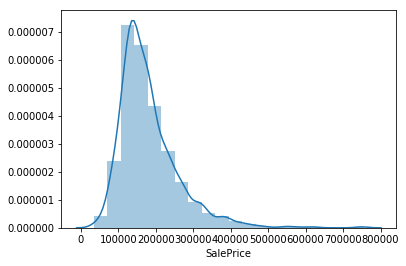

In [6]:
sns.distplot(train.SalePrice, bins= 20)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


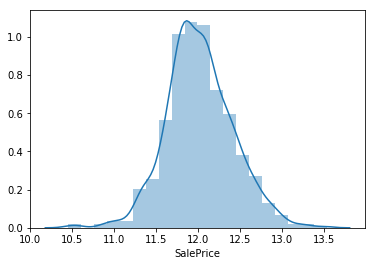

In [7]:
sns.distplot(np.log(train.SalePrice), bins = 20)

In [8]:
train['SalePrice'] = np.log1p(train['SalePrice'])

In [9]:
#function to fill in missing category columns with None per Data Description
def cat_filler(data):
    for col in ("PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu",
           "GarageType", "GarageFinish", "GarageQual", "GarageCond",
           "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
            "BsmtFinType2", "MSSubClass", "MasVnrType"):
        data[col] = data[col].fillna("None")
    return data

temp_train = cat_filler(temp_train)
temp_test = cat_filler(temp_test)


In [10]:
#seperate numerical columns
num_data = ['LotFrontage', 'LotArea', 'YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF', 
            '1stFlrSF','2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
            'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
            'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 
]


In [11]:
#seperate categorical columns
cat_data = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
            'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
            'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
            'BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir', 'Electrical',
            'KitchenQual', 'Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
            'PoolQC','Fence','MiscFeature','SaleType','SaleCondition'    
]

In [12]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy = 'mean')
cat_imputer = SimpleImputer(strategy = 'most_frequent')

In [13]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

In [14]:
#create class to allow pipeline to read in dataframe by column type
from sklearn.base import BaseEstimator , TransformerMixin

class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [15]:
#create pipelines
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_data)),
    ('scaler', StandardScaler()),
    ('imputer',num_imputer)
])
cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_data)),
    ('imputer',cat_imputer),
    ('oneHotEncoder',encoder)
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

pipeline = Pipeline([
    ('full_pipeline', full_pipeline),
    ('regressor', LinearRegression())
])

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
X_train = temp_train
X_test = temp_test
y = train['SalePrice']


lin_model = pipeline.fit(X_train, y)

scores = cross_val_score(pipeline, X_train, y, scoring = 'neg_mean_squared_error',cv=10)
score = np.sqrt(abs(scores))
print("RMSE: ", score.mean())

RMSE:  0.15603497956298543


In [24]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation", scores.std())

In [25]:
display_scores(score)

Scores: [0.13875836 0.12430385 0.12745043 0.19278886 0.15747705 0.18879663
 0.12819298 0.10265188 0.26794959 0.13198016]
Mean: 0.15603497956298543
Standard Deviation 0.04612713098407357


In [26]:
prediction = pipeline.predict(X_test)
print(prediction)

[11.67314412 12.06129062 12.12793402 ... 12.07677878 11.6517754
 12.30519156]


In [27]:
results = pd.DataFrame({
    "Id" : test["Id"],
    "SalePrice" : np.expm1(prediction)
})

In [28]:
results.to_csv("results2.csv", index = False)